<a href="https://colab.research.google.com/github/carlxen/CCMACLRL_EXERCISES_COM232/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [129]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

## Dataset File

In [127]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
one_hot_encoder = OneHotEncoder()
one_hot_encoding = one_hot_encoder.fit_transform(df[['Sex','Embarked']]).toarray()
df_one_hot = pd.DataFrame(one_hot_encoding, columns=one_hot_encoder.get_feature_names_out(['Sex','Embarked']))
print(df_one_hot.head)

<bound method NDFrame.head of      Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0           0.0       1.0         0.0         0.0         1.0           0.0
1           1.0       0.0         1.0         0.0         0.0           0.0
2           1.0       0.0         0.0         0.0         1.0           0.0
3           1.0       0.0         0.0         0.0         1.0           0.0
4           0.0       1.0         0.0         0.0         1.0           0.0
..          ...       ...         ...         ...         ...           ...
886         0.0       1.0         0.0         0.0         1.0           0.0
887         1.0       0.0         0.0         0.0         1.0           0.0
888         1.0       0.0         0.0         0.0         1.0           0.0
889         0.0       1.0         1.0         0.0         0.0           0.0
890         0.0       1.0         0.0         1.0         0.0           0.0

[891 rows x 6 columns]>


In [102]:
df_relevant = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']].copy()
df_processed = pd.concat([df_relevant, df_one_hot], axis=1)
display(df_processed.head(10))

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0
5,0,3,NaN,0,0,8.4583,0.0,1.0,0.0,1.0,0.0,0.0
6,0,1,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,1.0,0.0
7,0,3,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0,0.0
8,1,3,27.0,0,2,11.1333,1.0,0.0,0.0,0.0,1.0,0.0
9,1,2,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,0.0


In [103]:
mean_imputer = SimpleImputer(strategy='mean')
df_processed['Age'] = mean_imputer.fit_transform(df[['Age']])
df_processed.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0
5,0,3,29.699118,0,0,8.4583,0.0,1.0,0.0,1.0,0.0,0.0
6,0,1,54.000000,0,0,51.8625,0.0,1.0,0.0,0.0,1.0,0.0
7,0,3,2.000000,3,1,21.0750,0.0,1.0,0.0,0.0,1.0,0.0
8,1,3,27.000000,0,2,11.1333,1.0,0.0,0.0,0.0,1.0,0.0
9,1,2,14.000000,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,0.0


In [104]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Sex_female    891 non-null    float64
 7   Sex_male      891 non-null    float64
 8   Embarked_C    891 non-null    float64
 9   Embarked_Q    891 non-null    float64
 10  Embarked_S    891 non-null    float64
 11  Embarked_nan  891 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 83.7 KB


# Training the Model

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [106]:
x = df_processed.drop(['Survived'], axis=1)
y = df_processed['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [108]:
model.score(x_test, y_test)

0.8044692737430168

In [109]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[90, 15],
       [20, 54]])

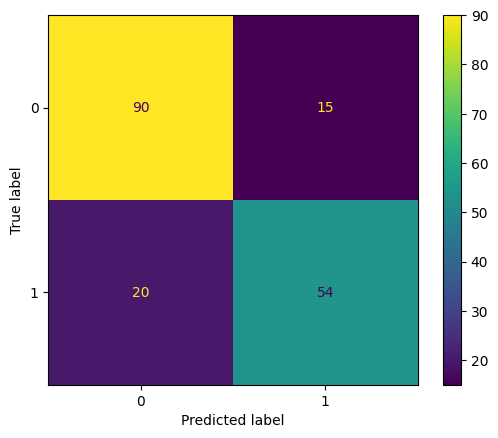

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Test File

In [97]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [98]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [117]:
dt.drop(columns = ['PassengerId', 'Name'], inplace = True)

In [118]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


## Sample Submission File

In [125]:
# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)

print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


## Generate Results

In [124]:
dt_processed = dt.drop(columns = ['Ticket', 'Cabin'])

dt_processed['Age'] = mean_imputer.transform(dt_processed[['Age']])
train_fare_mean = df['Fare'].mean()
dt_processed['Fare'] = dt_processed['Fare'].fillna(train_fare_mean)

dt_one_hot = one_hot_encoder.transform(dt_processed[['Sex', 'Embarked']]).toarray()
dt_one_hot_df = pd.DataFrame(dt_one_hot, columns=one_hot_encoder.get_feature_names_out(['Sex','Embarked']))

dt_processed = dt_processed.drop(['Sex', 'Embarked'], axis=1)

dt_processed = pd.concat([dt_processed, dt_one_hot_df], axis=1)

missing_cols_in_test = set(x.columns) - set(dt_processed.columns)
for c in missing_cols_in_test:
    dt_processed[c] = 0

extra_cols_in_test = set(dt_processed.columns) - set(x.columns)
dt_processed = dt_processed.drop(columns=list(extra_cols_in_test))

dt_processed = dt_processed[x.columns]

y_pred = model.predict(dt_processed)

sf_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'
sf = pd.read_csv(sf_url)

id = sf['PassengerId']


submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)

print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


In [126]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
